In [16]:
#建立Series物件
import numpy 
import pandas as pd 
s=pd.Series([12,29,72,4,8,10])
print(s)
del s

0    12
1    29
2    72
3     4
4     8
5    10
dtype: int64


In [8]:
#建立自訂索引Series物件
fruits=["蘋果","橘子","梨子","櫻桃"]
quantities = [15, 33, 45, 55]
s = pd.Series(quantities, index=fruits)
print(s)
print(s.index)
print(s.values)

del s,fruits,quantities

蘋果    15
橘子    33
梨子    45
櫻桃    55
dtype: int64
Index(['蘋果', '橘子', '梨子', '櫻桃'], dtype='object')
[15 33 45 55]


In [4]:
#Series物件加法的聯集運算
fruits=["蘋果","橘子","梨子","櫻桃"]
quantities = [15, 33, 45, 55]
s = pd.Series(quantities, index=fruits)
p = pd.Series([11, 16, 21, 32], index=fruits)
print(s + p)
print("總計=",sum(s+p))
del s,p,fruits,quantities

蘋果    26
橘子    49
梨子    66
櫻桃    87
dtype: int64
總計= 228


In [9]:
#Series物件使用索引取出資料
fruits=["蘋果","橘子","梨子","櫻桃"]
s = pd.Series([15, 33, 45, 55], index=fruits)
print("橘子=",s["橘子"])
print(s[["橘子","梨子","櫻桃"]])
print((s+2)*3)
import numpy as np
print(s.apply(np.sin))
del s,fruits

橘子= 33
橘子    33
梨子    45
櫻桃    55
dtype: int64
蘋果     51
橘子    105
梨子    141
櫻桃    171
dtype: int64
蘋果    0.650288
橘子    0.999912
梨子    0.850904
櫻桃   -0.999755
dtype: float64


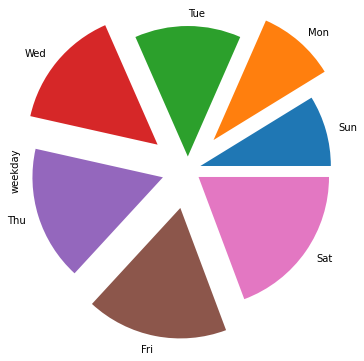

In [17]:
#使用Series物件繪製折線圖s.plot()
#自訂索引繪製折線圖
data = [100, 110, 150, 170, 190, 200, 220]
weekday = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
# s = pd.Series(data, index=weekday)
# s.plot()

#使用Series物件繪製長條圖 s.plot(kind="bar", rot=0)
s = pd.Series(data)
# s.plot(kind="bar", rot=0)

#使用Series物件繪製派圖/圓餅圖 s.plot(kind="pie")
# s.plot(kind="pie")

#使用突增值標示派圖的切片
s = pd.Series(data,index=weekday,name="weekday")
explode=[0.1,0.3,0.1,0.3,0.2,0.3,0.1]
s.plot(kind="pie",figsize=(6,6),explode=explode)
del s

   name  population city
0   中正區      159598  台北市
1   板橋區      551452  新北市
2   桃園區      441287  桃園市
3   北屯區      275207  台中市
4   安南區      192327  台南市
5   三民區      343203  高雄市
6   大安區      309835  台北市
7   永和區      222531  新北市
8   八德區      198473  桃園市
9   前鎮區      189623  高雄市
10  鳳山區      359125  高雄市
11  信義區      225561  台北市
12  新店區      302070  新北市


AttributeError: 'Line2D' object has no property 'encoding'

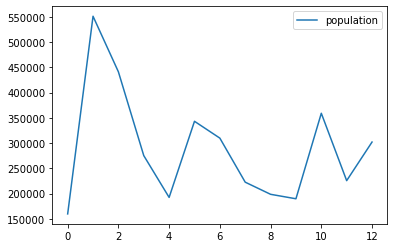

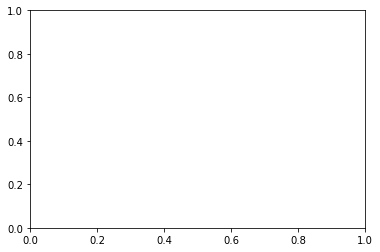

In [14]:
#建立DataFrame物件
import pandas as pd
dists={"name":["中正區","板橋區","桃園區","北屯區",
    "安南區","三民區","大安區","永和區",
    "八德區","前鎮區","鳳山區",
    "信義區","新店區"],
    "population": [159598, 551452, 441287, 275207,
    192327,343203, 309835, 222531,
    198473, 189623,359125,
    225561,302070],
    "city":["台北市","新北市","桃園市","台中市",
    "台南市","高雄市","台北市","新北市",
    "桃園市","高雄市","高雄市",
    "台北市","新北市"]}

#建立自訂索引DataFrame物件
ordinals =["first", "second", "third", "fourth", "fifth",
"sixth", "seventh", "eigth", "ninth", "tenth",
"eleventh", "twelvth", "thirteenth"]
df = pd.DataFrame(dists) #建立DataFrame物件
df.to_csv("dists.csv",encoding="utf8") 
print(df)

#使用DataFrame物件繪製折線圖df.plot()
df.plot()

#顯示完整x軸標籤的折線圖
df2 = pd.DataFrame(dists,columns=["population"],index=dists["name"])
df2.plot(xticks=range(len(df2.index)),use_index=True)
df2.plot(xticks=range(len(df2.index)),use_index= True,rot=90)

df2 = pd.DataFrame(dists) #建立自訂索引DataFrame物件
df2.index = ordinals
print(df2)

#重新指定DataFrame物件的欄位順序
df3=pd.DataFrame(dists,columns=["name","city","population"],index=ordinals)
print(df3) #重新指定DataFrame物件的欄位順序

#使用存在欄位作為索引標籤
df4 = pd.DataFrame(dists,columns = ["name", "population"],index = dists["city"])
print(df4) #使用存在欄位作為索引標籤



#轉置DataFrame物件
print(df.T)

#顯示 df.head()
print(df.head()) #顯示前五筆
print(df.head(3))
print(df.tail()) #顯示後五筆
print(df.tail(3))

#顯示自訂的欄位標籤、索引、欄位、資料
df.columns=["直轄市","區","人"]
print(df.head(4))
print(df.index)
print(df.columns)
print(df.values)
print("資料數=",len(df))
print("形狀:",df.shape)
df.info()

#走訪DataFrame物件df.iterrows()
for index, row in df.iterrows() :
    print(index, row["直轄市"], row["區"], row["人"])
    
#指定和重設欄位索引 df.set_index()
df2 = df.set_index("直轄市")
print(df2.head())
df3 = df2.reset_index()
print(df3.head())
df2 = df.set_index(["直轄市", "區"])
df2.sort_index(ascending=False, inplace=True)
print(df2)

del dists,df,df2,df3,df4

In [ ]:
# pd.to_csv(filename) 匯出成CSV格式的檔案
# pd.to_json(filename) 匯出成JSON格式的檔案
# pd.to_htm(filename) 匯出成HTM表格標的檔案
# pd.to_excel(filename) 匯出成Excel檔案
# pd.read_csv(filename) 匯入CSV格式的檔案
# pd.read_json(filename) 匯入JSON格式的檔案
# pd.read_htm(filename) 匯入HTM檔案・Pandas會抽出table表格標籤的資料
# pd.read_excel(filename) 匯入Excel檔案

In [74]:
#選擇資料
df = pd.read_csv("dists.csv", encoding="utf8")
ordinals =["first", "second", "third", "fourth", "fifth",
"sixth", "seventh", "eigth", "ninth", "tenth",
"eleventh", "twelvth", "thirteenth"]
df.index = ordinals

# #選擇單一欄位或多個欄位
# print(df["population"].head(3))
# print(df.population.head(3))
# print(df[["city","name"]].head(3))

# #選擇特定範圍的多筆資料
# print(df[0:3])
# print(df["sixth":"eleventh"])

#使用標籤選擇資料 df.loc[index,column]
# print(df.loc[ordinals[1]])
# print(type(df.loc[ordinals[1]]))
# print(df.loc[:,["name","population"]].head(1))
# print(df.loc["third":"fifth", ["name","population"]])
# print(df.loc["third", ["name", "population"]])
# print(df.loc[ordinals[0], "name"])
# print(type(df.loc[ordinals[0], "name"]))
# print(df.loc["first", "population"])
# print(type(df.loc["first","population"]))

#使用欄位選擇資料 df.iloc[row_index,column_index] df.iat[]
# print(df.iloc[3]) #第4筆
# print()
# print(df.iloc[3:5,1:3])#切割
# print()
# print(df.iloc[1:3,:1]) #切割列
# print()
# print(df.iloc[:,1:3])#切割欄
# print()
# print(df.iloc[[1,2,4],[0,2]])#索引清單
# print()
# print(df.iloc[1,1])
# print()
# print(df.iat[1,1])

del df,ordinals

Unnamed: 0         1
name             板橋區
population    551452
city             新北市
Name: second, dtype: object
<class 'pandas.core.series.Series'>


In [58]:
#過濾資料
df = pd.read_csv("dists.csv", encoding="utf8")
ordinals =["first", "second", "third", "fourth", "fifth",
"sixth", "seventh", "eigth", "ninth", "tenth",
"eleventh", "twelvth", "thirteenth"]
df.index = ordinals

#使用布林索引和isin()函數過濾資料
print(df[df.population > 350000])
print(df[df["city"].isin(["台北市","高雄市"])])
print(df[(df.population > 350000) & (df.population<500000)])
print(df[df["city"].str.startswith("台")])
del df,ordinals

          Unnamed: 0 name  population city
second             1  板橋區      551452  新北市
third              2  桃園區      441287  桃園市
eleventh          10  鳳山區      359125  高雄市
          Unnamed: 0 name  population city
first              0  中正區      159598  台北市
sixth              5  三民區      343203  高雄市
seventh            6  大安區      309835  台北市
tenth              9  前鎮區      189623  高雄市
eleventh          10  鳳山區      359125  高雄市
twelvth           11  信義區      225561  台北市
          Unnamed: 0 name  population city
third              2  桃園區      441287  桃園市
eleventh          10  鳳山區      359125  高雄市
         Unnamed: 0 name  population city
first             0  中正區      159598  台北市
fourth            3  北屯區      275207  台中市
fifth             4  安南區      192327  台南市
seventh           6  大安區      309835  台北市
twelvth          11  信義區      225561  台北市


In [62]:
#排序資料
df = pd.read_csv("dists.csv", encoding="utf8")
ordinals =["first", "second", "third", "fourth", "fifth",
"sixth", "seventh", "eigth", "ninth", "tenth",
"eleventh", "twelvth", "thirteenth"]
df.index = ordinals

#指定索引欄位排序 df.sort_index(ascending=False, inplace=True)
#ascending 默认true 升序
#inplace 是否更新原DataFrame排序
# df2 = df.set_index("population")
# print(df2.head())
# df2.sort_index(ascending=False, inplace=True)
# print(df2.head())

#指定欄位值排序 
df2 = df.sort_values("population", ascending=False)
print(df2.head())
df.sort_values(["city", "population"], inplace=True)
print(df.head())
del df,df2

          Unnamed: 0 name  population city
second             1  板橋區      551452  新北市
third              2  桃園區      441287  桃園市
eleventh          10  鳳山區      359125  高雄市
sixth              5  三民區      343203  高雄市
seventh            6  大安區      309835  台北市
         Unnamed: 0 name  population city
fourth            3  北屯區      275207  台中市
first             0  中正區      159598  台北市
twelvth          11  信義區      225561  台北市
seventh           6  大安區      309835  台北市
fifth             4  安南區      192327  台南市


In [94]:
#更新資料
df = pd.read_csv("dists.csv", encoding="utf8")
ordinals =["first", "second", "third", "fourth", "fifth",
"sixth", "seventh", "eigth", "ninth", "tenth",
"eleventh", "twelvth", "thirteenth"]
df.index = ordinals

#更新純量值
# df.loc[ordinals[0], "population"] = 160000
# df.iloc[1,2] = 560000
# print(df.head(2))

#更新單筆紀錄
# s=["新莊區",416640,"新北市"]
# df.loc[ordinals[1],["name","population","city"]] = s[:]
# print(df.head(2))

#更新整個DataFrame物件
import numpy as np
# df.loc[:, "population"] = np.random.randint(34000, 700000,size=len(df))
# print(df.head())

#更新整個欄位值
df = pd.DataFrame(np.random.randint(5,1500, size=(2,3)))
print(df)
print(df[df > 800])
df[df > 800] = df - 100
print(df)

del df,ordinals,s

      0     1    2
0   308   700  901
1  1421  1121  135
        0       1      2
0     NaN     NaN  901.0
1  1421.0  1121.0    NaN
      0     1    2
0   308   700  801
1  1321  1021  135


In [98]:
#刪除資料
df = pd.read_csv("dists.csv", encoding="utf8")
ordinals =["first", "second", "third", "fourth", "fifth",
"sixth", "seventh", "eigth", "ninth", "tenth",
"eleventh", "twelvth", "thirteenth"]
df.index = ordinals

#刪除純量值
# df.loc[ordinals[0], "population"] = None
# df.iloc[1,2] = None
# print(df.head(3))

#刪除紀錄 df.drop()
# df2 = df.drop(["second", "fourth"])#2,4筆
# print(df2.head())
# df.drop(df.index[[2,3]], inplace=True)#3,4筆
# print(df.head())

#刪除欄位
# df2 = df.drop(["population"], axis=1)
# print(df2.head(3))

        Unnamed: 0 name city
first            0  中正區  台北市
second           1  板橋區  新北市
third            2  桃園區  桃園市


In [108]:
#新增資料
df = pd.read_csv("dists.csv", encoding="utf8")
ordinals =["first", "second", "third", "fourth", "fifth",
"sixth", "seventh", "eigth", "ninth", "tenth",
"eleventh", "twelvth", "thirteenth"]
df.index = ordinals

#新增紀錄 df.append(obkect,ignore_index,verify_integrity,sort)
# other: DataFrame, series、 dict、 list这样的数据结构
# ignore_index:默认值为False如果为True则不使用index标签
# verify_integrity:默认值为False,如果为True当创建相同的index时会抛出ValueError的异常
# sort:boolean,默认是None,该属性在pandas0.23.0的版本才存在。    
# df.loc["third-1",["name","population","city"]]=["士林區",288340,"台北市"]
# print(df.tail(3))
# s=pd.Series({"city":"新北市","name":"中和區","population":413291})
# df2 = df.append(s, ignore_index=True)
# print(df2.tail(3))

#使用新增紀錄建立DataFrame物件
# import pandas as pd
# from numpy.random import randint
# df = pd.DataFrame(columns=("qty1", "qty2", "qty3"))
# for i in range(5):
#     df.loc[i] = [randint(-1,1) for n in range(3)]
# print(df)
# df2 = pd.DataFrame(columns=("qty1", "qty2", "qty3"))
# for i in range(5):
#     s = pd.Series({"qty1":randint(-1,1),"qty2":randint(-1,1),"qty3":randint(-1,1)})
#     df2 = df2.append(s, ignore_index=True)
# print(df2)

#新增欄位
df["area"] = pd.Series([randint(6000,9000) for n in range(len(df))]).values
print(df.head())
df.loc[:,"zip"] = randint(100, 120, size=len(df))
print(df.head())

del df,ordinals,s,df2

        Unnamed: 0 name  population city  area
first            0  中正區      159598  台北市  8494
second           1  板橋區      551452  新北市  8186
third            2  桃園區      441287  桃園市  7767
fourth           3  北屯區      275207  台中市  8395
fifth            4  安南區      192327  台南市  8118
        Unnamed: 0 name  population city  area  zip
first            0  中正區      159598  台北市  8494  105
second           1  板橋區      551452  新北市  8186  111
third            2  桃園區      441287  桃園市  7767  114
fourth           3  北屯區      275207  台中市  8395  117
fifth            4  安南區      192327  台南市  8118  106


In [123]:
df = pd.read_csv("dists.csv", encoding="utf8")
ordinals =["first", "second", "third", "fourth", "fifth",
"sixth", "seventh", "eigth", "ninth", "tenth",
"eleventh", "twelvth", "thirteenth"]
df.index = ordinals

#建立空的DataFrame物件
# columns =["city","name", "population"]
# df_empty = pd.DataFrame(np.nan, index=ordinals,
# columns=columns)
# print(df_empty)

#複製DataFrame物件 df.copy
# df_copy = df.copy
# print(df_copy)

#連接多個DataFrame物件 df.concat()
# import pandas as pd
# from numpy.random import randint
# df1 =pd.DataFrame(randint(5,10,size=(3,4)),columns=["a","b","c","d"])
# df2 =pd.DataFrame(randint(5,10,size=(2,3)),columns=["b","d","a"])
# df3 = pd.concat([df1,df2])
# print(df3)
# df4 = pd.concat([df1,df2], ignore_index=True)
# print(df4)

#合併2個 DataFrame物件 df.merge(,how)
#how:inner,left,right,outer
df1 = pd.DataFrame({"key":["a","b","b"], "data1":range(3)})
df2 = pd.DataFrame({"key":["a","b","c"], "data2":range(3)})
df3 = pd.merge(df1,df2)
print(df3)
df4 = pd.merge(df2, df1)
print(df4)
df5 = pd.merge(df2, df1, how='left')
print(df5)

del df,df2,df3,df4,df5,ordinals,df_empty,df_copy

  key  data1  data2
0   a      0      0
1   b      1      1
2   b      2      1
  key  data2  data1
0   a      0      0
1   b      1      1
2   b      1      2
  key  data2  data1
0   a      0    0.0
1   b      1    1.0
2   b      1    2.0
3   c      2    NaN


In [136]:
#群組、樞紐分析與套用函數

#群組 df.groupby([column].sum())
# df = pd.DataFrame({"名稱":["客户A","客户B","客户A","客户B",
# "客户A","客户B","客户A","客户A"],
# "編號":["訂單1","訂單1","訂單2","訂單3",
# "訂單2","訂單2","訂單1","訂單3"],
# "數量":np.random.randint(1,5,size=8),
# "售價":np.random.randint(150,500,size=8)})
# print(df)
# print(df.groupby("名稱").sum())
# print()
# print(df.groupby(["名稱","編號"]).sum())
# del df

#樞紐分析
# products = pd.DataFrame({"分類":["居家","居家","娛樂","娛樂","科技","科技"],
# "商店":["家樂福","頂好","家樂福","全聯","頂好","家樂福"],
# "價格":[11.42,23.50,19.99,15.95,55.75,111.55],
# "測試分數":[4,3,5,7,5,8]})
# print(products)
# print()
# pivot_products = products.pivot_table(index='分類',columns='商店',values='價格')
# print(pivot_products)
# del products,pivot_products

#套用函數 df.apply(函數) 函數：np.cumsum()
# import pandas as pd
# import numpy as np
df = pd.DataFrame(np.random.rand(6,4),columns=list("ABCD"))
print(df)
print()
df2 = df.apply(np.cumsum)
print(df2)
print()
df3 = df.apply(lambda x: x.max() - x.min())
print(df3)

          A         B         C         D
0  0.761173  0.557823  0.454348  0.665271
1  0.596212  0.659500  0.232734  0.916493
2  0.170283  0.637969  0.332512  0.244191
3  0.723244  0.685474  0.374374  0.900936
4  0.007092  0.774258  0.894018  0.661902
5  0.351073  0.249860  0.449910  0.948121

          A         B         C         D
0  0.761173  0.557823  0.454348  0.665271
1  1.357385  1.217323  0.687082  1.581764
2  1.527668  1.855292  1.019594  1.825954
3  2.250912  2.540766  1.393968  2.726891
4  2.258004  3.315024  2.287985  3.388793
5  2.609077  3.564883  2.737895  4.336913

A    0.754081
B    0.524398
C    0.661284
D    0.703930
dtype: float64


                     population      area
Zhongzheng District      159598    7.6071
Banqiao District         551452   23.1373
Taoyuan District         441287   34.8046
Beitun District          275207   62.7034
Annan District           192327  107.2016
Sanmin District          343203   19.7866
Da'an District           309835   11.3614
Yonghe District          222531    5.7138
Bade District            198473   33.7111
Qianzhen District        189623   19.1207
Fengshan District        359125   26.7590
Xinyi District           225561   11.2077
Xindian District         302070  120.2255
             0
count  8.00000
mean   4.50000
std    2.44949
min    1.00000
25%    2.75000
50%    4.50000
75%    6.25000
max    8.00000


<AxesSubplot:title={'center':'Box Chart'}>

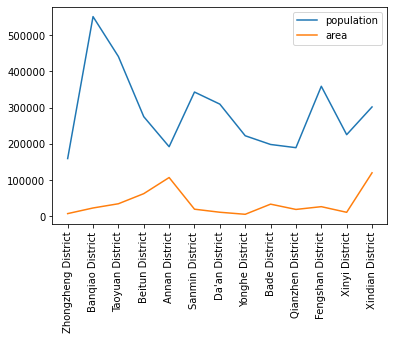

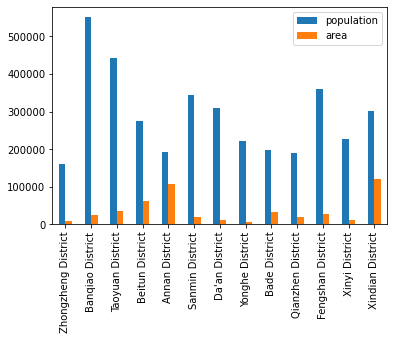

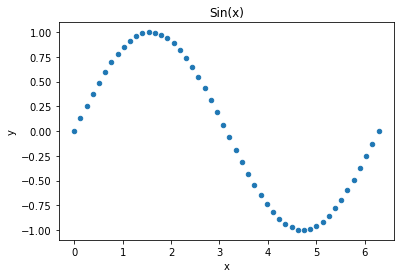

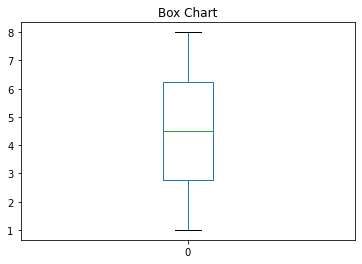

In [30]:
#建立DataFrame物件
import pandas as pd
dists={"name":["Zhongzheng District", "Banqiao District", "Taoyuan District", "Beitun District",
     "Annan District", "Sanmin District", "Da'an District", "Yonghe District",
     "Bade District", "Qianzhen District", "Fengshan District",
     "Xinyi District", "Xindian District"],
    "population": [159598, 551452, 441287, 275207,
    192327,343203, 309835, 222531,
    198473, 189623,359125,
    225561,302070],
    "city":["Taipei City", "New Taipei City", "Taoyuan City", "Taichung City",
     "Tainan City", "Kaohsiung City", "Taipei City", "New Taipei City",
     "Taoyuan City", "Kaohsiung City", "Kaohsiung City",
     "Taipei City", "New Taipei City"]}

#使用DataFrame物件繪製折線圖df.plot()
#顯示完整x軸標籤的折線圖
# df = pd.DataFrame(dists,columns=["population"],index=dists["name"])
# print(df)
# df.plot(xticks=range(len(df.index)),use_index=True)
# df.plot(xticks=range(len(df.index)),use_index= True,rot=90)
# df.plot()

#使用兩個資料集來繪製折線圖
dists["area"]=([7.6071, 23.1373, 34.8046, 62.7034,
107.2016, 19.7866, 11.3614,5.7138,
33.7111, 19.1207, 26.7590,
11.2077,120.2255])
df = pd.DataFrame(dists,columns=["population","area"],index=dists["name"])
print(df)
df["area"] *=1000
df.plot(xticks=range(len(df.index)),use_index= True,rot=90)

#使用DataFrame物件繪製長條圖 df.plot(kind="bar", rot=0)
df.plot(kind="bar", rot=90)

#使用DataFrame物件繪製散佈圖df.plot(kind= "scatter")
import numpy as np
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
df = pd.DataFrame({"x":x, "y":y})
df.plot(kind= "scatter", x="x", y="y",title="Sin(x)")

#使用DataFrame物件繪製箱形圖
# df.boxplot(dists,columns=["population","area"],by=["name"],figsize=(6,5))
data = [1, 2, 3, 4, 5, 6, 7, 8]
df = pd.DataFrame(data)
print(df.describe())
df.plot.box(title="Box Chart")

In [29]:
?objext.boxplot()

Object `iris.boxplot()` not found.
